In [25]:
%pip install -q matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

1) Load the csv file and show the top 5 records from it

In [27]:
players = pd.read_csv("players_20.csv")
players.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/20/159586,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/20/159586,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-silva-santos-jr/20/159586,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/159586,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/20/159586,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


2) How you would be able to see each column's name

In [28]:
print(players.columns.values)

['sofifa_id' 'player_url' 'short_name' 'long_name' 'age' 'dob' 'height_cm'
 'weight_kg' 'nationality' 'club' 'overall' 'potential' 'value_eur'
 'wage_eur' 'player_positions' 'preferred_foot' 'international_reputation'
 'weak_foot' 'skill_moves' 'work_rate' 'body_type' 'real_face'
 'release_clause_eur' 'player_tags' 'team_position' 'team_jersey_number'
 'loaned_from' 'joined' 'contract_valid_until' 'nation_position'
 'nation_jersey_number' 'pace' 'shooting' 'passing' 'dribbling'
 'defending' 'physic' 'gk_diving' 'gk_handling' 'gk_kicking' 'gk_reflexes'
 'gk_speed' 'gk_positioning' 'player_traits' 'attacking_crossing'
 'attacking_finishing' 'attacking_heading_accuracy'
 'attacking_short_passing' 'attacking_volleys' 'skill_dribbling'
 'skill_curve' 'skill_fk_accuracy' 'skill_long_passing'
 'skill_ball_control' 'movement_acceleration' 'movement_sprint_speed'
 'movement_agility' 'movement_reactions' 'movement_balance'
 'power_shot_power' 'power_jumping' 'power_stamina' 'power_strength'
 'po

3) Show the numbers of rows and columns

In [29]:
print(f"There are {players.shape[0]} rows and {players.shape[1]} columns")

There are 18278 rows and 104 columns


4) Show the number of players and their countries
5) Show only the top 10 countries

In [30]:
unique_players = players['long_name'].unique()
print(f"There are {unique_players.shape[0]} total players")
players.groupby(['nationality'])['nationality'].count().sort_values(ascending=False).head(10)

There are 18218 total players


nationality
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: nationality, dtype: int64

In [31]:
dropme = players.columns.values.tolist()
dropme.remove('nationality')
dropme.remove('age')

6) Now you have to create a bar plot of top 5 countries and their number of players, try to fill green color in bars

<Axes: xlabel='nationality'>

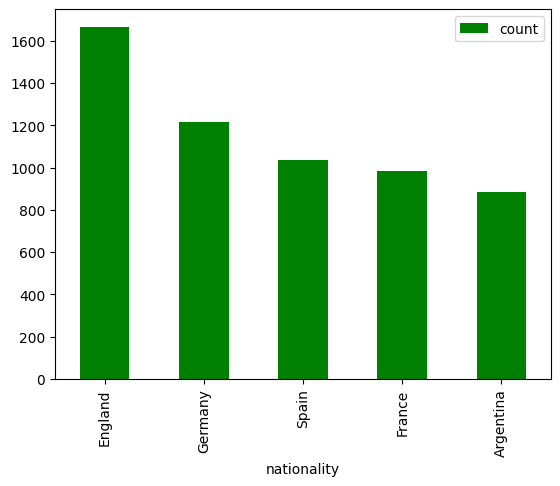

In [32]:
nat_players = players.groupby(['nationality']).count().reset_index().drop(labels=dropme,axis=1).rename(columns = {"age": "count"})
top5 = nat_players.sort_values(by='count', ascending=False).head(5)
top5.plot.bar(x='nationality', y='count',color='green')

7) Show top 5 players short name and wages.

In [33]:
dropme = players.columns.values.tolist()
dropme.remove('short_name')
dropme.remove('wage_eur')
players.drop(labels=dropme,axis=1).head(5)

,short_name,wage_eur
0,L. Messi,565000
1,Cristiano Ronaldo,405000
2,Neymar Jr,290000
3,J. Oblak,125000
4,E. Hazard,470000


8) Show the top 5 players name and wages that are getting the highest salaries

In [34]:
top_salaries = players.sort_values(by='wage_eur', ascending=False).drop(labels=dropme, axis=1).head(5)
top_salaries

,short_name,wage_eur
0,L. Messi,565000
4,E. Hazard,470000
1,Cristiano Ronaldo,405000
5,K. De Bruyne,370000
22,A. Griezmann,370000


9) create a bar plot of #8

<Axes: xlabel='short_name'>

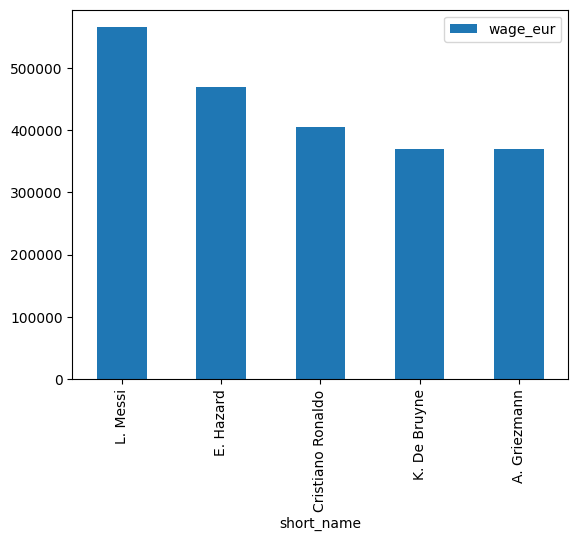

In [35]:
top_salaries.plot.bar(x='short_name', y='wage_eur')

10) Show top 10 records of Germany.

In [36]:
germans = players.loc[players['nationality'] == 'Germany']
germans.head(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
6,192448,https://sofifa.com/player/192448/marc-andre-ter-stegen/20/159586,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,167495,https://sofifa.com/player/167495/manuel-neuer/20/159586,M. Neuer,Manuel Neuer,33,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,182521,https://sofifa.com/player/182521/toni-kroos/20/159586,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,...,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
37,188350,https://sofifa.com/player/188350/marco-reus/20/159586,M. Reus,Marco Reus,30,1989-05-31,180,71,Germany,Borussia Dortmund,...,69+3,65+3,65+3,65+3,69+3,64+3,55+3,55+3,55+3,64+3
49,178603,https://sofifa.com/player/178603/mats-hummels/20/159586,M. Hummels,Mats Hummels,30,1988-12-16,191,94,Germany,Borussia Dortmund,...,77+3,83+3,83+3,83+3,77+3,78+3,84+3,84+3,84+3,78+3
55,222492,https://sofifa.com/player/222492/leroy-sane/20/159586,L. Sané,Leroy Sané,23,1996-01-11,183,75,Germany,Manchester City,...,65+2,59+2,59+2,59+2,65+2,61+2,52+2,52+2,52+2,61+2
61,212622,https://sofifa.com/player/212622/joshua-kimmich/20/159586,J. Kimmich,Joshua Kimmich,24,1995-02-08,176,73,Germany,FC Bayern München,...,83+3,82+3,82+3,82+3,83+3,81+3,78+3,78+3,78+3,81+3
70,189596,https://sofifa.com/player/189596/thomas-muller/20/159586,T. Müller,Thomas Müller,29,1989-09-13,186,75,Germany,FC Bayern München,...,69+3,68+3,68+3,68+3,69+3,67+3,62+3,62+3,62+3,67+3
77,212190,https://sofifa.com/player/212190/niklas-sule/20/159586,N. Süle,Niklas Süle,23,1995-09-03,195,97,Germany,FC Bayern München,...,71+2,77+2,77+2,77+2,71+2,75+2,83+2,83+2,83+2,75+2
109,235790,https://sofifa.com/player/235790/kai-havertz/20/159586,K. Havertz,Kai Havertz,20,1999-06-11,188,83,Germany,Bayer 04 Leverkusen,...,65+2,63+2,63+2,63+2,65+2,62+2,54+2,54+2,54+2,62+2


11) Now show top 5 records of Germany players who have maximum height, weight and wages.

In [37]:
germans.sort_values(by='height_cm', ascending=False).head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
8016,236831,https://sofifa.com/player/236831/aaron-seydel/20/159586,A. Seydel,Aaron Seydel,23,1996-02-07,199,90,Germany,1. FSV Mainz 05,...,46+2,43+2,43+2,43+2,46+2,44+2,43+2,43+2,43+2,44+2
1217,200212,https://sofifa.com/player/200212/michael-esser/20/159586,M. Esser,Michael Esser,31,1987-11-22,198,97,Germany,Hannover 96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1389,199833,https://sofifa.com/player/199833/lars-unnerstall/20/159586,L. Unnerstall,Lars Unnerstall,28,1990-07-20,198,103,Germany,PSV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11859,167437,https://sofifa.com/player/167437/dominik-stroh-engel/20/159586,D. Stroh-Engel,Dominik Stroh-Engel,33,1985-11-27,197,94,Germany,SpVgg Unterhaching,...,39+2,45+2,45+2,45+2,39+2,39+2,47+2,47+2,47+2,39+2
13576,239746,https://sofifa.com/player/239746/lukas-watkowiak/20/159586,L. Watkowiak,Lukas Watkowiak,23,1996-03-06,197,103,Germany,SV Wehen Wiesbaden,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
germans.sort_values(by='weight_kg', ascending=False).head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
13576,239746,https://sofifa.com/player/239746/lukas-watkowiak/20/159586,L. Watkowiak,Lukas Watkowiak,23,1996-03-06,197,103,Germany,SV Wehen Wiesbaden,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1389,199833,https://sofifa.com/player/199833/lars-unnerstall/20/159586,L. Unnerstall,Lars Unnerstall,28,1990-07-20,198,103,Germany,PSV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,179783,https://sofifa.com/player/179783/ralf-fahrmann/20/159586,R. Fährmann,Ralf Fährmann,30,1988-09-27,197,98,Germany,Norwich City,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1217,200212,https://sofifa.com/player/200212/michael-esser/20/159586,M. Esser,Michael Esser,31,1987-11-22,198,97,Germany,Hannover 96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,212190,https://sofifa.com/player/212190/niklas-sule/20/159586,N. Süle,Niklas Süle,23,1995-09-03,195,97,Germany,FC Bayern München,...,71+2,77+2,77+2,77+2,71+2,75+2,83+2,83+2,83+2,75+2


In [39]:
germans.sort_values(by='wage_eur', ascending=False).head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
36,182521,https://sofifa.com/player/182521/toni-kroos/20/159586,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,...,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
6,192448,https://sofifa.com/player/192448/marc-andre-ter-stegen/20/159586,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,222492,https://sofifa.com/player/222492/leroy-sane/20/159586,L. Sané,Leroy Sané,23,1996-01-11,183,75,Germany,Manchester City,...,65+2,59+2,59+2,59+2,65+2,61+2,52+2,52+2,52+2,61+2
146,186942,https://sofifa.com/player/186942/ilkay-gundogan/20/159586,I. Gündoğan,İlkay Gündoğan,28,1990-10-24,180,80,Germany,Manchester City,...,76+3,79+3,79+3,79+3,76+3,74+3,72+3,72+3,72+3,74+3
70,189596,https://sofifa.com/player/189596/thomas-muller/20/159586,T. Müller,Thomas Müller,29,1989-09-13,186,75,Germany,FC Bayern München,...,69+3,68+3,68+3,68+3,69+3,67+3,62+3,62+3,62+3,67+3


12) Show top 5 Germany player's short name and wages

In [40]:
dropme = players.columns.values.tolist()
dropme.remove('short_name')
dropme.remove('wage_eur')
germans.drop(labels=dropme,axis=1).head(5)

,short_name,wage_eur
6,M. ter Stegen,250000
31,M. Neuer,155000
36,T. Kroos,330000
37,M. Reus,170000
49,M. Hummels,130000


13) Show top 5 players who have great shooting skills among all with short name.

In [41]:
dropme = players.columns.values.tolist()
dropme.remove('short_name')
dropme.remove('shooting')
players.sort_values(by='shooting', ascending=False).drop(labels=dropme,axis=1).head(5)

,short_name,shooting
1,Cristiano Ronaldo,93.0
0,L. Messi,92.0
12,H. Kane,91.0
17,S. Agüero,90.0
205,F. Quagliarella,89.0


14) Show top 5 players records (short name, defending, nationality, and club) that have awesome defending skills.

In [42]:
dropme = players.columns.values.tolist()
dropme.remove('short_name')
dropme.remove('defending')
dropme.remove('nationality')
dropme.remove('club')
players.sort_values(by='defending', ascending=False).drop(labels=dropme,axis=1).head(5)

,short_name,nationality,club,defending
16,G. Chiellini,Italy,Juventus,90.0
7,V. van Dijk,Netherlands,Liverpool,90.0
11,K. Koulibaly,Senegal,Napoli,89.0
35,D. Godín,Uruguay,Inter,89.0
49,M. Hummels,Germany,Borussia Dortmund,89.0


15 - 18. Show records for wages, shooting, defending, and nationality of top 5 players of 'Real Madrid' team.

In [43]:
dropme = players.columns.values.tolist()
dropme.remove('wage_eur')
dropme.remove('short_name')
dropme.remove('defending')
dropme.remove('shooting')
dropme.remove('nationality')
dropme.remove('club')
players.loc[players['club'] == 'Real Madrid'].drop(labels=dropme,axis=1).head(5)

,short_name,nationality,club,wage_eur,shooting,defending
4,E. Hazard,Belgium,Real Madrid,470000,83.0,35.0
8,L. Modrić,Croatia,Real Madrid,340000,76.0,72.0
18,Sergio Ramos,Spain,Real Madrid,300000,68.0,87.0
28,T. Courtois,Belgium,Real Madrid,235000,NaN,NaN
36,T. Kroos,Germany,Real Madrid,330000,80.0,70.0


Bonus

In [44]:
pd.set_option('display.max_colwidth', None)
dropme = players.columns.values.tolist()
dropme.remove('long_name')
dropme.remove('player_url')
players.drop(labels=dropme, axis=1).head(5)

,player_url,long_name
0,https://sofifa.com/player/158023/lionel-messi/20/159586,Lionel Andrés Messi Cuccittini
1,https://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/20/159586,Cristiano Ronaldo dos Santos Aveiro
2,https://sofifa.com/player/190871/neymar-da-silva-santos-jr/20/159586,Neymar da Silva Santos Junior
3,https://sofifa.com/player/200389/jan-oblak/20/159586,Jan Oblak
4,https://sofifa.com/player/183277/eden-hazard/20/159586,Eden Hazard


In [45]:
americans = players.loc[players['nationality'] == 'United States']
americans

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
583,227796,https://sofifa.com/player/227796/christian-pulisic/20/159586,C. Pulisic,Christian Pulisic,20,1998-09-18,177,69,United States,Chelsea,...,62+3,56+3,56+3,56+3,62+3,59+3,47+3,47+3,47+3,59+3
629,204082,https://sofifa.com/player/204082/john-brooks/20/159586,J. Brooks,John Anthony Brooks,26,1993-01-28,193,78,United States,VfL Wolfsburg,...,68+2,73+2,73+2,73+2,68+2,70+2,77+2,77+2,77+2,70+2
1264,232999,https://sofifa.com/player/232999/tyler-adams/20/159586,T. Adams,Tyler Adams,20,1999-02-14,176,68,United States,RB Leipzig,...,72+2,74+2,74+2,74+2,72+2,72+2,72+2,72+2,72+2,72+2
1267,238744,https://sofifa.com/player/238744/weston-mckennie/20/159586,W. McKennie,Weston McKennie,20,1998-08-28,185,84,United States,FC Schalke 04,...,73+2,75+2,75+2,75+2,73+2,73+2,77+2,77+2,77+2,73+2
1292,234777,https://sofifa.com/player/234777/zack-steffen/20/159586,Z. Steffen,Zack Steffen,24,1995-04-02,191,86,United States,Fortuna Düsseldorf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,242706,https://sofifa.com/player/242706/jacob-akanyirige/20/159586,J. Akanyirige,Jacob Akanyirige,17,2001-12-31,180,73,United States,San Jose Earthquakes,...,46+2,44+2,44+2,44+2,46+2,48+2,49+2,49+2,49+2,48+2
17954,242907,https://sofifa.com/player/242907/bryan-reynolds/20/159586,B. Reynolds,Bryan Reynolds,18,2001-06-28,191,77,United States,FC Dallas,...,33+2,35+2,35+2,35+2,33+2,33+2,35+2,35+2,35+2,33+2
18067,247038,https://sofifa.com/player/247038/justin-haak/20/159586,J. Haak,Justin Haak,17,2001-09-12,184,75,United States,New York City FC,...,47+2,49+2,49+2,49+2,47+2,47+2,50+2,50+2,50+2,47+2
18109,252416,https://sofifa.com/player/252416/don-deedson-louicius/20/159586,D. Louicius,Don Deedson Louicius,18,2001-02-11,180,65,United States,Hobro IK,...,37+2,33+2,33+2,33+2,37+2,35+2,29+2,29+2,29+2,35+2


In [46]:
americans.shape[0]

347

([<matplotlib.patches.Wedge at 0x1ffc8442290>,
 [Text(-1.098210835724716, 0.06271331833686411, 'Global'),
  Text(1.098210837926582, -0.06271327977864492, 'America')])

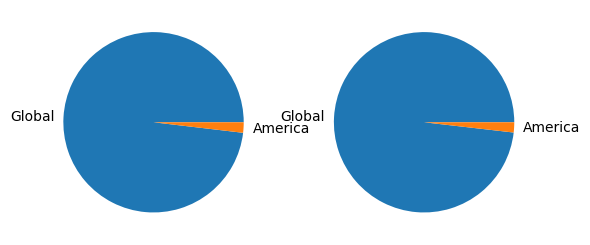

In [47]:
count_world = players.shape[0]
count_america = americans.shape[0]
overall_world = players['overall'].sum()
overall_america = americans['overall'].sum()
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie([count_world, count_america], labels=['Global', 'America'])
ax2.pie([overall_world, overall_america], labels=['Global', 'America'])